In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("data/PI_316201901.csv", low_memory=False)
df = df[df["REGN"] == 1481] # Сбербанк

In [72]:
# Check for null values
df.drop('TIP', axis=1).isnull().groupby(df["TIP"]).sum()

,REGN,OKATO,PREDR_K,PREDR_O,PREDV_K,PREDV_O,SVSK_R,SVSK_V,SVS_R,SVS_V,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,85,85,85,85,0,0,0,0,0,0,85,85,85,85
2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
# Sums of aggregate values
sum_columns = ["PREDR_K", "PREDR_O", "PREDV_K", "PREDV_O", "DKREDR_K", "DKREDV_K", "ZDLR", "ZDLV", "ZDLPRR", "ZDLPRV"]
sum_results = df.groupby("TIP")[sum_columns].sum()
sum_results

,PREDR_K,PREDR_O,PREDV_K,PREDV_O,DKREDR_K,DKREDV_K,ZDLR,ZDLV,ZDLPRR,ZDLPRV
TIP,,,,,,,,,,
1,43458,8.489352e+07,0,0.00000,3132572,937,3.796366e+09,1.537642e+06,3.314941e+07,6.606728e+05
1.1,43455,8.489051e+07,0,0.00000,3037768,411,3.781133e+09,1.334434e+06,3.110640e+07,5.455849e+05
1.1.1,11477,2.566609e+07,0,0.00000,349444,0,6.102458e+08,0.000000e+00,1.267775e+06,0.000000e+00
1.1.2,875,1.360451e+06,0,0.00000,60362,0,8.986014e+07,0.000000e+00,9.364902e+03,0.000000e+00
2,11591576,3.532323e+08,1425,74325.29889,28014685,7392,6.464161e+09,2.636121e+06,1.671790e+08,1.713745e+06
2.1,43456,8.489181e+07,0,0.00000,3037856,411,3.781313e+09,1.334434e+06,3.111520e+07,5.455849e+05


In [74]:
# Means of weighted means
mean_columns = ["SVSK_R", "SVSK_V", "SVS_R", "SVS_V", "SSKRR", "SSKRV", "SPSR", "SPSV"]
mean_results = df.groupby("TIP")[mean_columns].mean()
mean_results

,SVSK_R,SVSK_V,SVS_R,SVS_V,SSKRR,SSKRV,SPSR,SPSV
TIP,,,,,,,,
1,203.476471,0.0,9.869412,0.0,167.017647,50.712941,10.402741,6.993765
1.1,203.477647,0.0,9.869412,0.0,167.244706,45.798824,10.394129,5.019506
1.1.1,192.604706,0.0,9.668235,0.0,174.875294,0.000000,9.835812,0.000000
1.1.2,135.663529,0.0,10.836471,0.0,138.508235,0.000000,9.633894,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,203.477647,0.0,9.869412,0.0,167.242353,44.787059,10.394271,4.892447


In [75]:
# Вывести сумму просроченных ипотечных кредитов, предоставленных физическим лицам по всем регионам (в тыс. руб., Сбербанк)
df[df["TIP"] == "2.1"]["ZDLPRR"].sum()

np.float64(31115203.476849996)

In [96]:
def get_ZDLPRR(regn: int, remote=True) -> pd.DataFrame:
    df = pd.DataFrame(index=pd.date_range(start="20160101", end="20211201", freq="MS"))
    for year in np.arange(2016, 2022):
        for month in np.arange(1, 13):
            if year in np.arange(2016, 2020):
                if year == 2019:
                    if month == 1:
                        tip = "1.1"
                    else:
                        tip = "2.1"
                else:
                    tip = "1.1"
            else:
                tip = "2.1"
            if month < 10:
                if month == 1:
                    month_file = "12"
                    year_file = str(year - 1)
                else:
                    month_file = "0" + str(month - 1)
                    year_file = str(year)
                month = "0" + str(month)
            else:
                if month == 10:
                    month_file = "0" + str(month - 1)
                else:
                    month_file = str(month - 1)
                month = str(month)
                year_file = str(year)
            if remote:
                url = "https://raw.githubusercontent.com/JarlPenguin/anomaly_analysis_2025/refs/heads/main/data/" + "PI_316" + year_file + month_file + ".csv"
            else:
                url = "data/PI_316" + year_file + month_file + ".csv"
            df_data = pd.read_csv(url, low_memory=False, dtype={"TIP": object})
            df_data = df_data[df_data["REGN"] == regn] # Сбербанк
            overdue_sum = df_data[df_data["TIP"] == tip]["ZDLPRR"].sum()
            date = str(year) + str(month) + "01"
            df.at[date, "ZDLPRR"] = overdue_sum
    return df

In [97]:
#sberbank_ZDLPRR = get_ZDLPRR(1481) # Сбербанк
sberbank_ZDLPRR = get_ZDLPRR(1481, False) # Сбербанк
sberbank_ZDLPRR

,ZDLPRR
2016-01-01,2.211142e+07
2016-02-01,2.302183e+07
2016-03-01,2.348600e+07
2016-04-01,2.404515e+07
2016-05-01,2.474015e+07
...,...
2021-08-01,2.616502e+07
2021-09-01,2.559667e+07
2021-10-01,2.475784e+07
2021-11-01,2.424239e+07


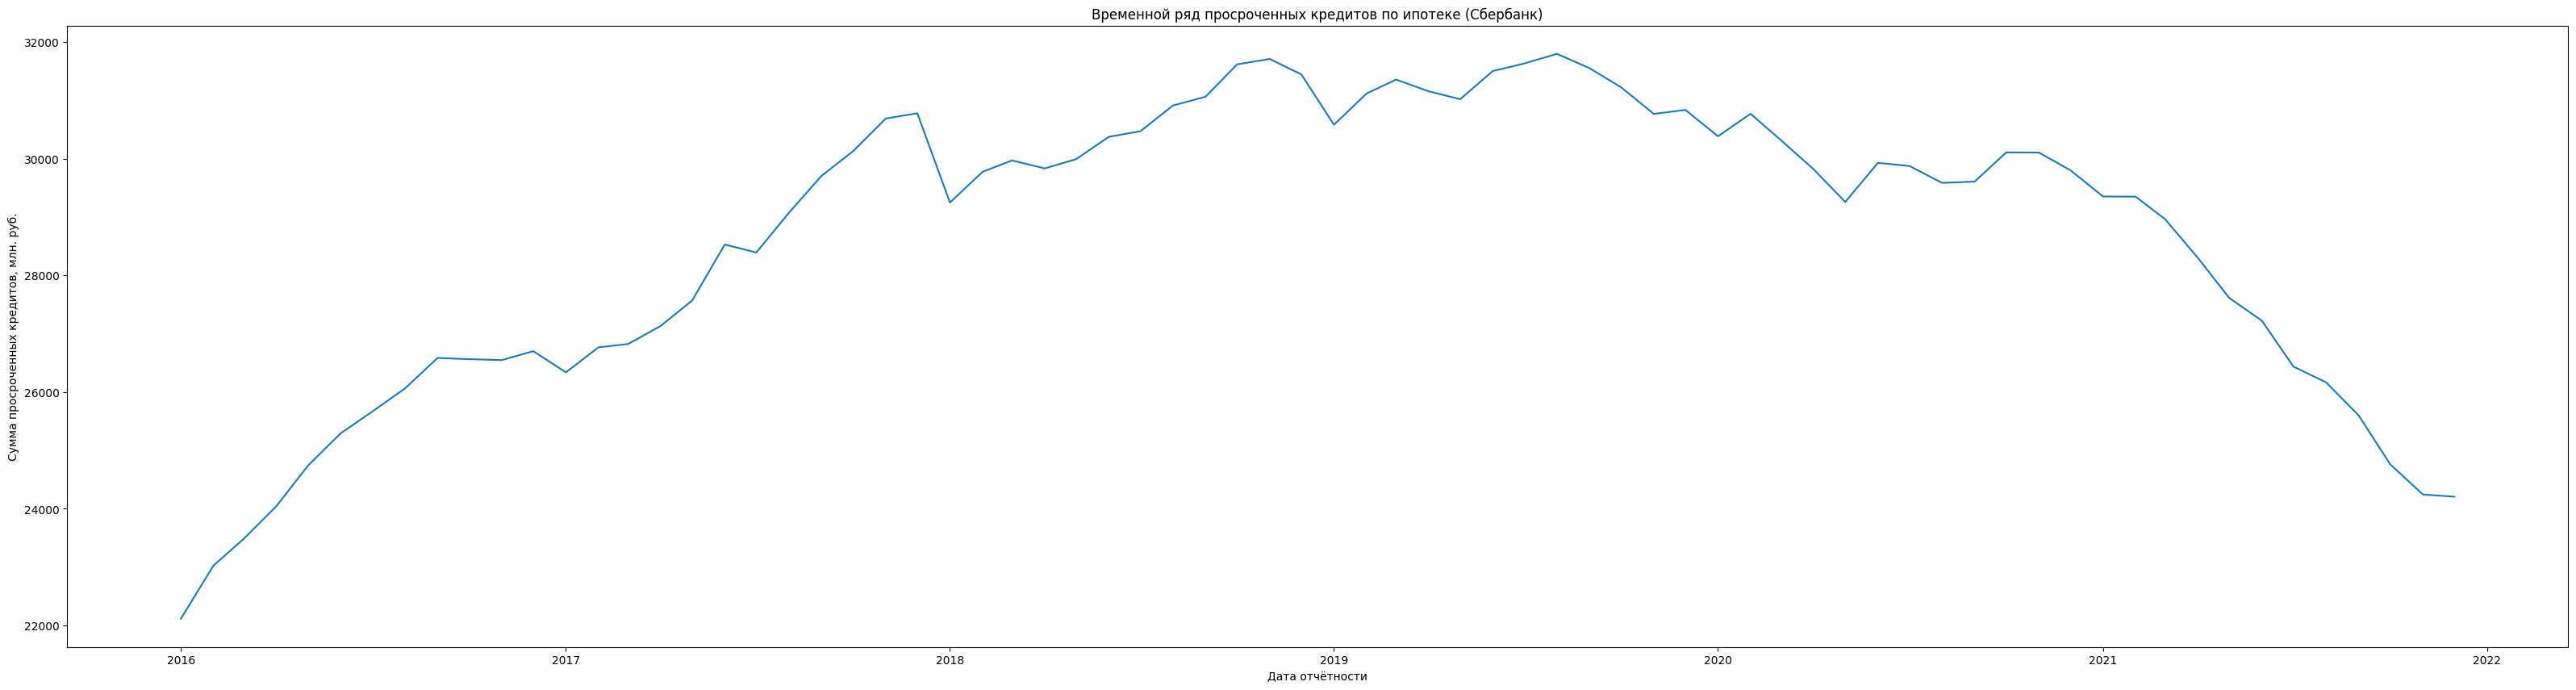

In [98]:
sberbank_ZDLPRR_fig = sberbank_ZDLPRR.copy()
sberbank_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(sberbank_ZDLPRR_fig)
#plt.xticks(sberbank_ZDLPRR_fig[sberbank_ZDLPRR_fig.index <= "20190101"].index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Сбербанк)")
plt.show()

In [99]:
#otkrytiye_ZDLPRR = get_ZDLPRR(2209) # Открытие
otkrytiye_ZDLPRR = get_ZDLPRR(2209, False) # Открытие
otkrytiye_ZDLPRR

,ZDLPRR
2016-01-01,8.689100e+05
2016-02-01,8.799360e+05
2016-03-01,8.892960e+05
2016-04-01,8.935510e+05
2016-05-01,9.089810e+05
...,...
2021-08-01,2.633535e+06
2021-09-01,2.599465e+06
2021-10-01,2.515071e+06
2021-11-01,2.532673e+06


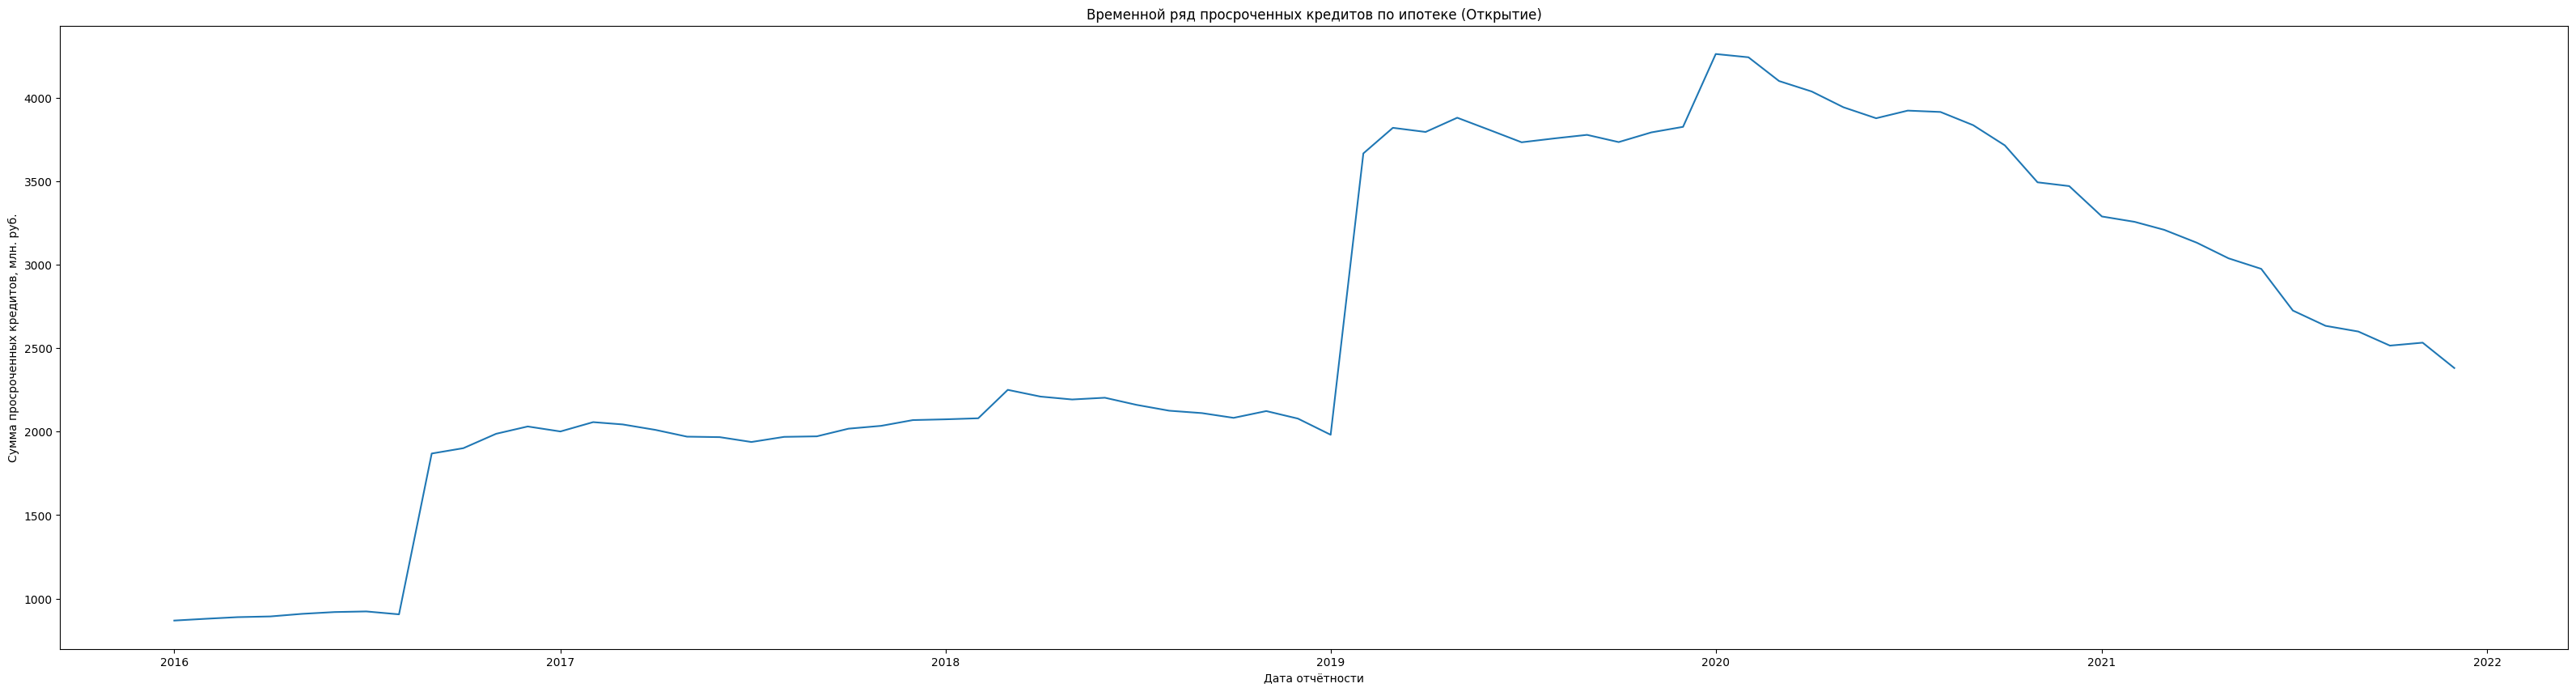

In [109]:
otkrytiye_ZDLPRR_fig = otkrytiye_ZDLPRR.copy()
otkrytiye_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(otkrytiye_ZDLPRR_fig)
#plt.xticks(otkrytiye_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (Открытие)")
plt.show()

In [101]:
#mkb_ZDLPRR = get_ZDLPRR(1978) # МКБ
mkb_ZDLPRR = get_ZDLPRR(1978, False) # МКБ
mkb_ZDLPRR

,ZDLPRR
2016-01-01,6.320800e+04
2016-02-01,6.408700e+04
2016-03-01,6.455900e+04
2016-04-01,6.494900e+04
2016-05-01,6.331600e+04
...,...
2021-08-01,1.069062e+06
2021-09-01,1.067141e+06
2021-10-01,1.072848e+06
2021-11-01,1.108841e+06


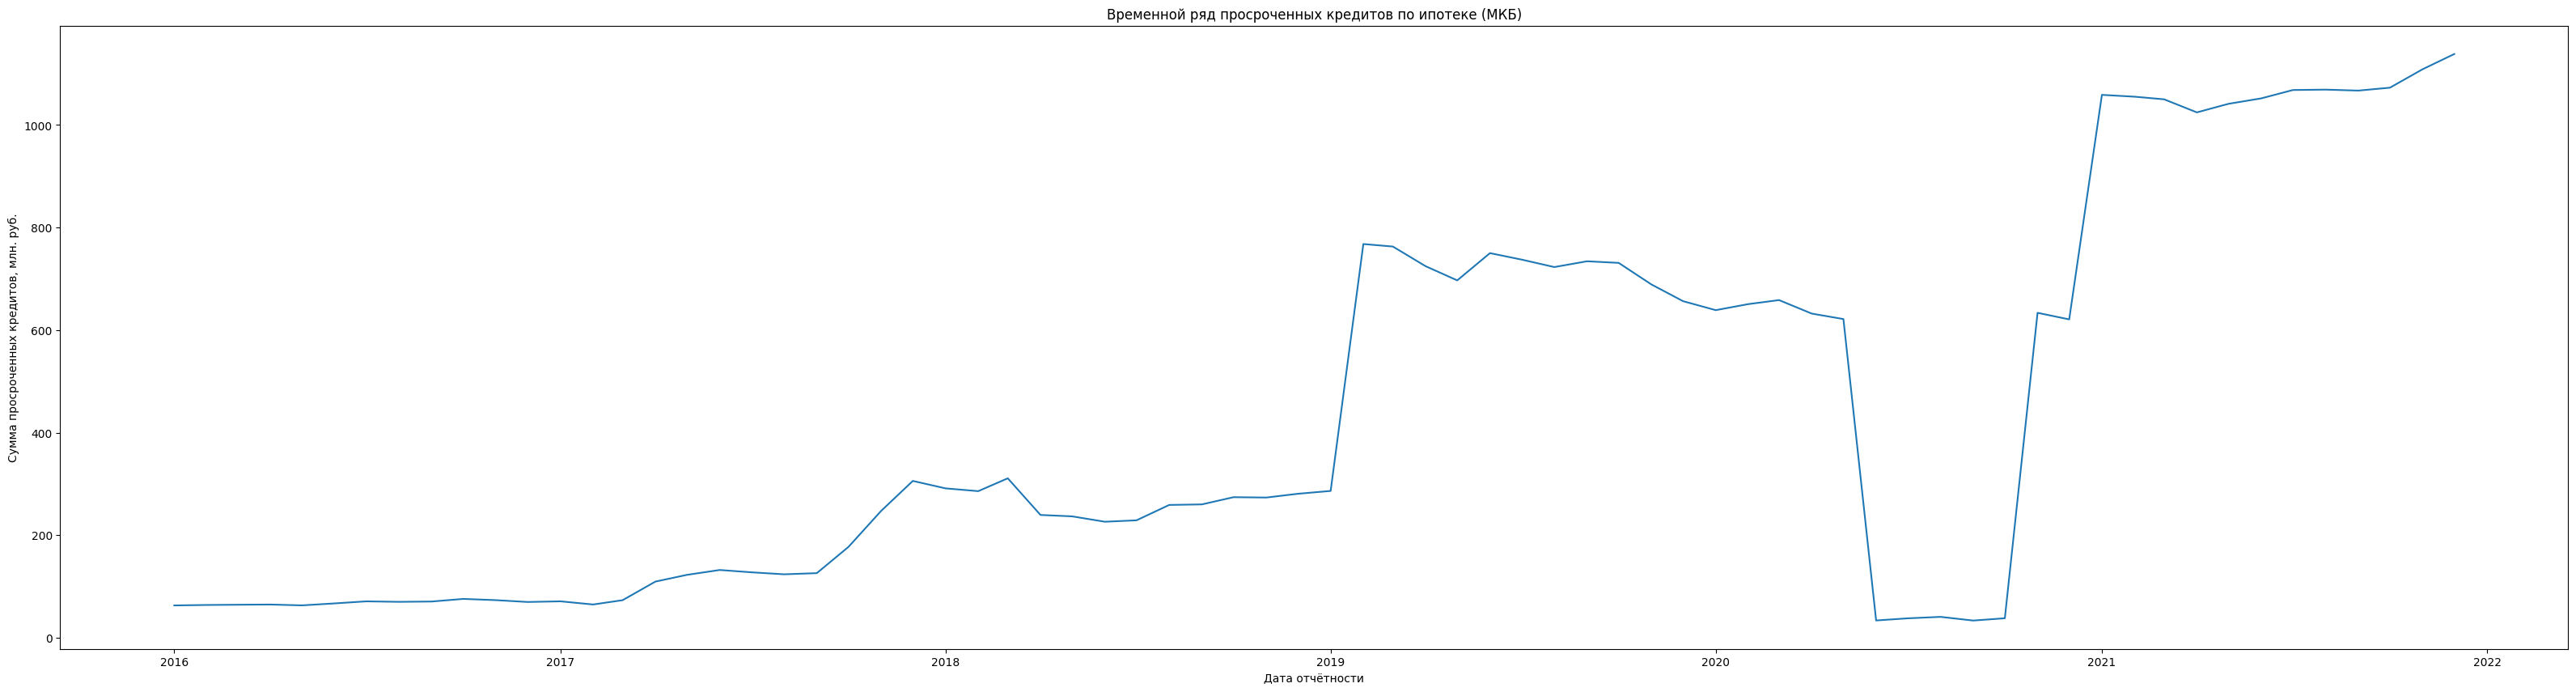

In [108]:
mkb_ZDLPRR_fig = mkb_ZDLPRR.copy()
mkb_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(mkb_ZDLPRR_fig)
#plt.xticks(mkb_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (МКБ)")
plt.show()

In [103]:
#vtb_ZDLPRR = get_ZDLPRR(1000) # ВТБ
vtb_ZDLPRR = get_ZDLPRR(1000, False) # ВТБ
vtb_ZDLPRR

,ZDLPRR
2016-01-01,5.220000e+02
2016-02-01,5.230000e+02
2016-03-01,5.230000e+02
2016-04-01,5.220000e+02
2016-05-01,5.220000e+02
...,...
2021-08-01,1.127995e+07
2021-09-01,1.121051e+07
2021-10-01,1.085327e+07
2021-11-01,1.058719e+07


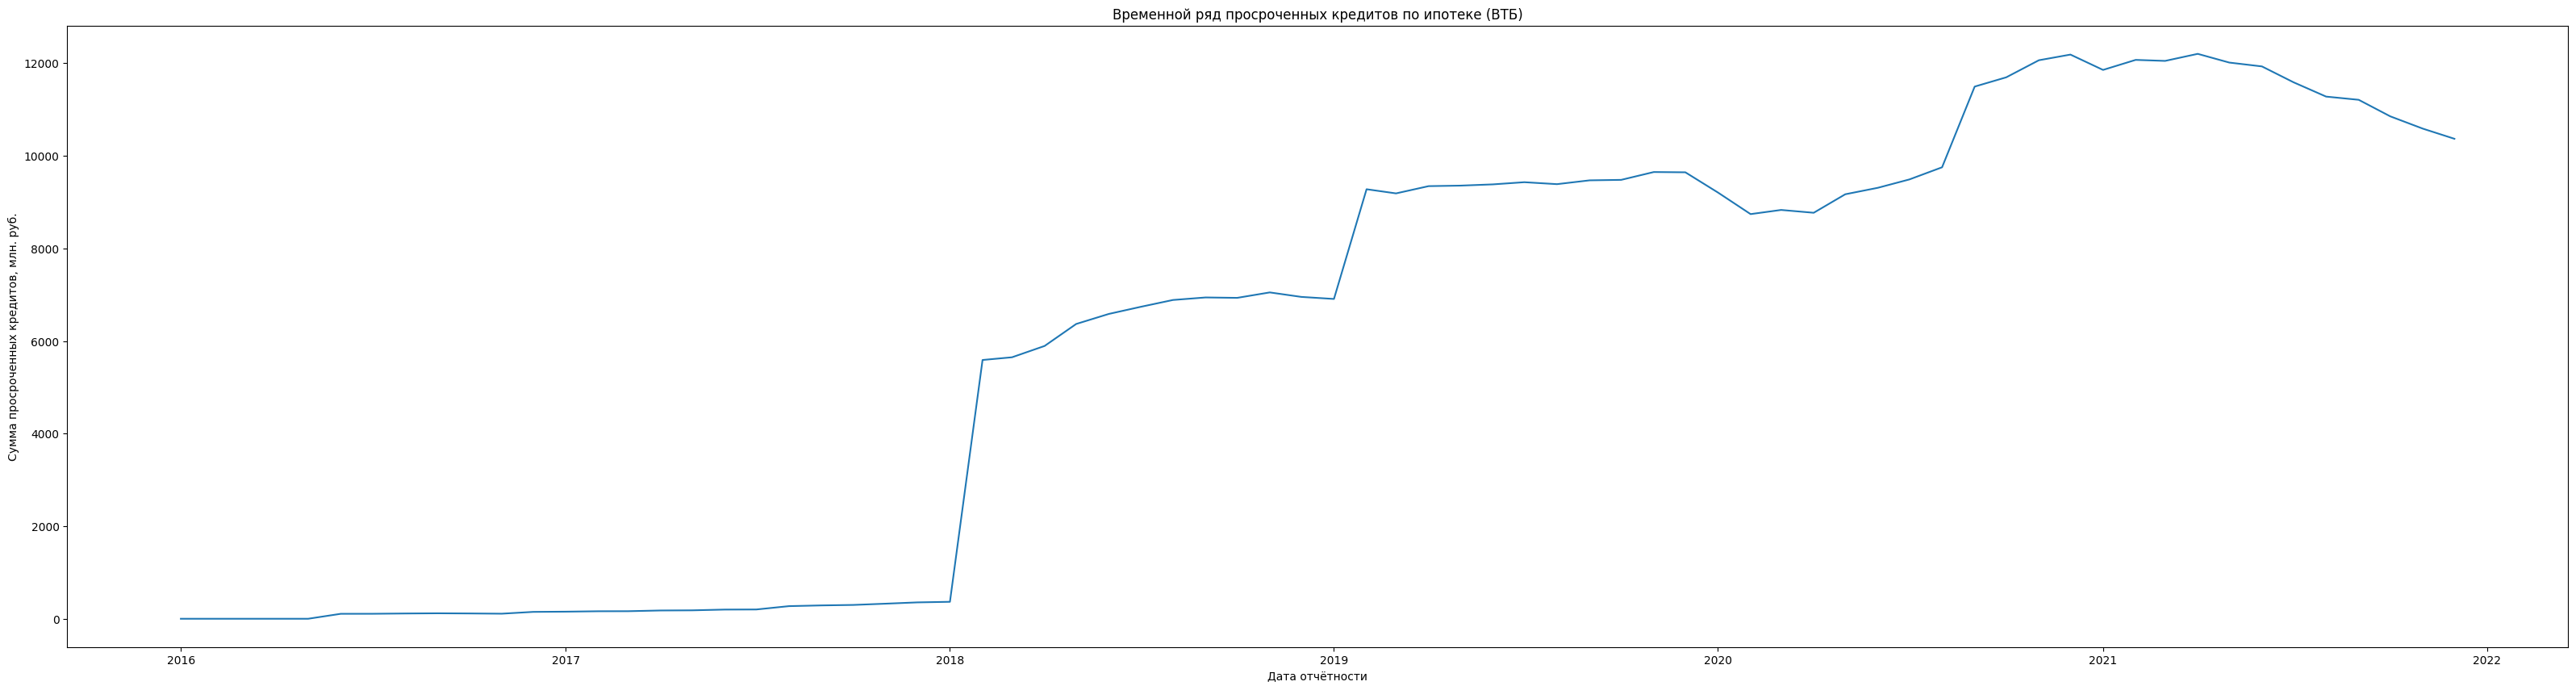

In [107]:
vtb_ZDLPRR_fig = vtb_ZDLPRR.copy()
vtb_ZDLPRR_fig["ZDLPRR"] /= 1000
plt.figure(figsize=(40, 10))
plt.plot(vtb_ZDLPRR_fig)
#plt.xticks(vtb_ZDLPRR_fig.index)
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке (ВТБ)")
plt.show()

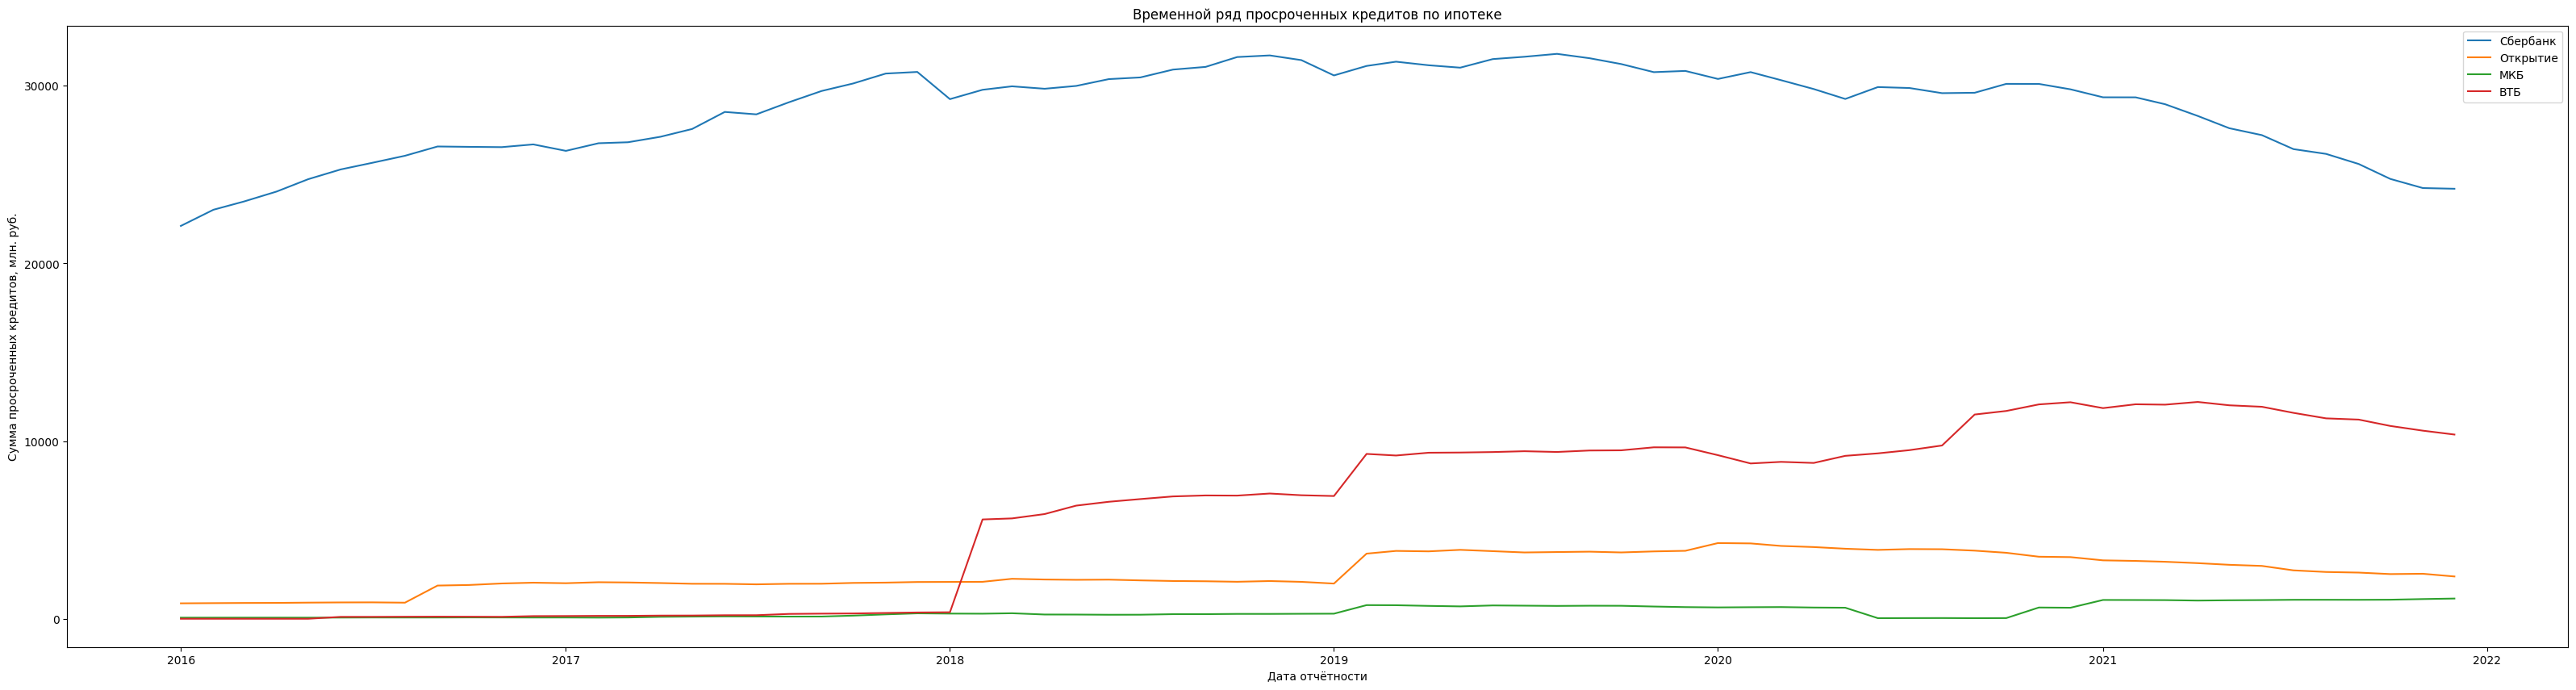

In [106]:
plt.figure(figsize=(40, 10))
plt.plot(sberbank_ZDLPRR_fig, label="Сбербанк")
plt.plot(otkrytiye_ZDLPRR_fig, label="Открытие")
plt.plot(mkb_ZDLPRR_fig, label="МКБ")
plt.plot(vtb_ZDLPRR_fig, label="ВТБ")
#plt.xticks(sberbank_ZDLPRR_fig.index)
plt.yticks(np.arange(0, np.round(np.max([sberbank_ZDLPRR_fig, otkrytiye_ZDLPRR_fig, mkb_ZDLPRR_fig, vtb_ZDLPRR_fig]), -1), 10000))
plt.xlabel("Дата отчётности")
plt.ylabel("Сумма просроченных кредитов, млн. руб.")
plt.title("Временной ряд просроченных кредитов по ипотеке")
plt.legend()
plt.show()